## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

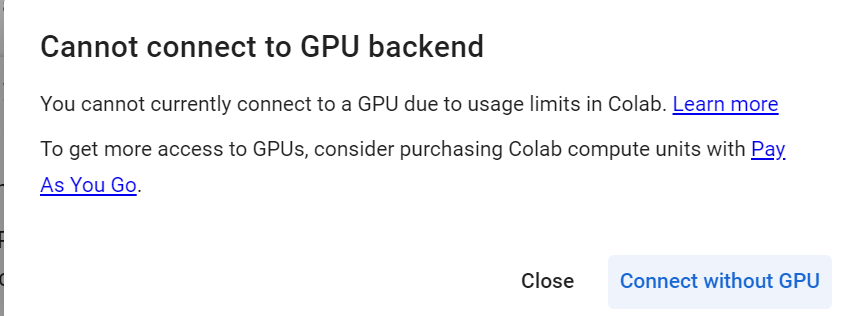

## **Installing and Importing Necessary Libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics





In [ ]:
!pip install nltk


In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:


# to use regular expressions for manipulating text data
import re

# to manipulate string data
import string

# to remove the accented characters
import unidecode

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
# nltk.download('punkt')    # loading the punkt module used in tokenization
# nltk.download('omw-1.4')    # dependency for tokenization
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to visualize text data using wordcloud
# from wordcloud import STOPWORDS

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to perform tokenization
# from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the SpaCy library
import spacy
nlp = spacy.load('en_core_web_sm')    # loading the envrionment config

# Used in tokenization
from spacy.lang.en import English

# To create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# To create TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# To import Word2Vec
from gensim.models import Word2Vec

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ModuleNotFoundError: No module named 'unidecode'

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.2 MB/s eta 0:00:00


In [ ]:
# installing the libraries for transformers
!pip install -U -q sentence-transformers transformers bitsandbytes accelerate sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 8.8 MB/s eta 0:00:00


In [ ]:
# installing libraries to remove accented characters and use word embeddings
!pip install unidecode gensim -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 12.6 MB/s eta 0:00:00


In [ ]:
!pip install zeugma

  Preparing metadata (setup.py) ... done
  Created wheel for zeugma: filename=zeugma-0.49-py3-none-any.whl size=8789 sha256=d4052c6a03e51aac17c44c110a05c5995578a64263af2a5186889360f24a45df
  Stored in directory: /root/.cache/pip/wheels/33/55/16/3d9155ec34c3a4b3c5488ea8905fd994a6cafd68b8e3e26489
Successfully built zeugma


In [ ]:
!pip install wheel
!pip install setuptools

In [ ]:
!pip install pybind11

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 20.9 MB/s eta 0:00:00


## **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/My Drive/Project 7: Stock Market News Sentiment

Mounted at /gdrive
/gdrive/My Drive/Project 7: Stock Market News Sentiment


In [ ]:
data = pd.read_csv("stock_news.csv")

## **Data Overview**

Checking the first five rows of the data

In [ ]:
data.head(15)

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.74000,42.24500,41.48250,40.24691,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.74000,42.24500,41.48250,40.24691,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.74000,42.24500,41.48250,40.24691,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.74000,42.24500,41.48250,40.24691,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.74000,42.24500,41.48250,40.24691,130672400,-1
5,2019-01-02,Apple CEO Tim Cook discussed the company's Q1 ...,41.74000,42.24500,41.48250,40.24691,130672400,0
6,2019-01-02,Roku Inc has announced plans to offer premium...,41.74000,42.24500,41.48250,40.24691,130672400,1
7,2019-01-02,Wall Street saw modest gains on Wednesday but...,41.74000,42.24500,41.48250,40.24691,130672400,-1
8,2019-01-02,Apple's fiscal first quarter revenue came in ...,41.74000,42.24500,41.48250,40.24691,130672400,-1
9,2019-01-02,Apple Inc. lowered its quarterly sales foreca...,41.74000,42.24500,41.48250,40.24691,130672400,-1


Checking the shape of the dataset

In [ ]:
data.shape

(349, 8)

Checking for Missing Values

In [ ]:
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


Checking for duplicate values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

In [ ]:
data.dtypes

,0
Date,object
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


## **Exploratory Data Analysis**

**EDA Functions**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def count_words(text):
    return len(text.split())



In [ ]:
# Create a new column 'wordcount' by applying the count_words function to the 'news' column
data['wordcount'] = data['News'].apply(count_words)

In [ ]:
def count_characters(text):
    return len(text)

In [ ]:
data['charcount'] = data['News'].apply(count_characters)



In [ ]:
# Calculate the difference between the two columns
data['difference'] = data['Open'] - data['Close']

# Function to flag the difference as 'gain', 'loss', or 'none'
def flag_difference(diff):
    if diff > 0:
        return 'gain'
    elif diff < 0:
        return 'loss'
    else:
        return 'same'

# Credayate a new column 'flag' by applying the flag_difference function to the 'difference' column
data['daystatus'] = data['difference'].apply(flag_difference)

In [ ]:
data.tail(5)

,Date,News,Open,High,Low,Close,Volume,Label,wordcount,charcount,difference,daystatus
344,2019-04-30,"Media mogul Oprah Winfrey, known for influenc...",50.76500,50.85000,49.77750,48.70879,186139600,-1,47,299,2.05621,gain
345,2019-04-30,"European shares fell on Tuesday, with banks u...",50.76500,50.85000,49.77750,48.70879,186139600,-1,40,274,2.05621,gain
346,2019-04-30,This article reports that the S&P 500 reached...,50.76500,50.85000,49.77750,48.70879,186139600,-1,47,315,2.05621,gain
347,2019-04-30,The Federal Reserve is anticipated to keep in...,50.76500,50.85000,49.77750,48.70879,186139600,-1,57,383,2.05621,gain
348,2019-04-30,"In the first quarter, South Korea's Samsung E...",50.76500,50.85000,49.77750,48.70879,186139600,0,53,314,2.05621,gain


### Univariate Analysis

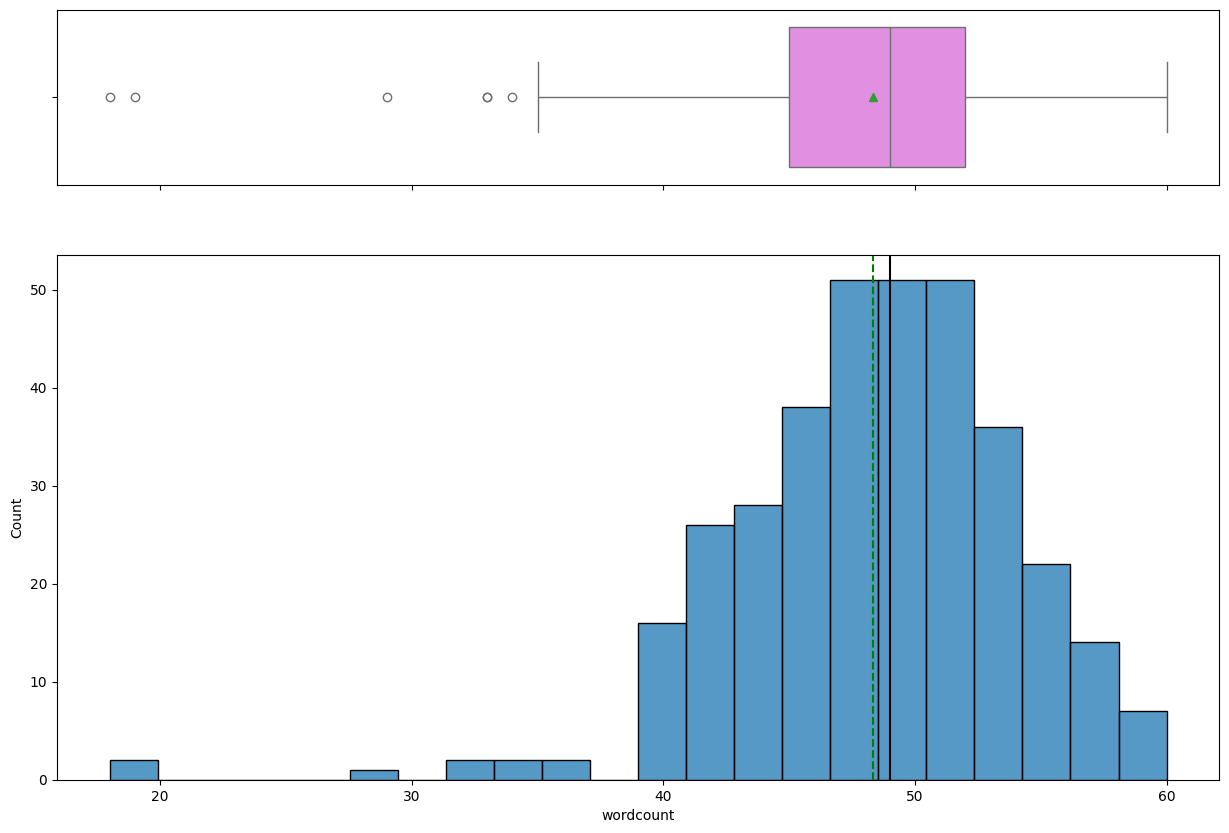

In [ ]:
histogram_boxplot(data, "wordcount")

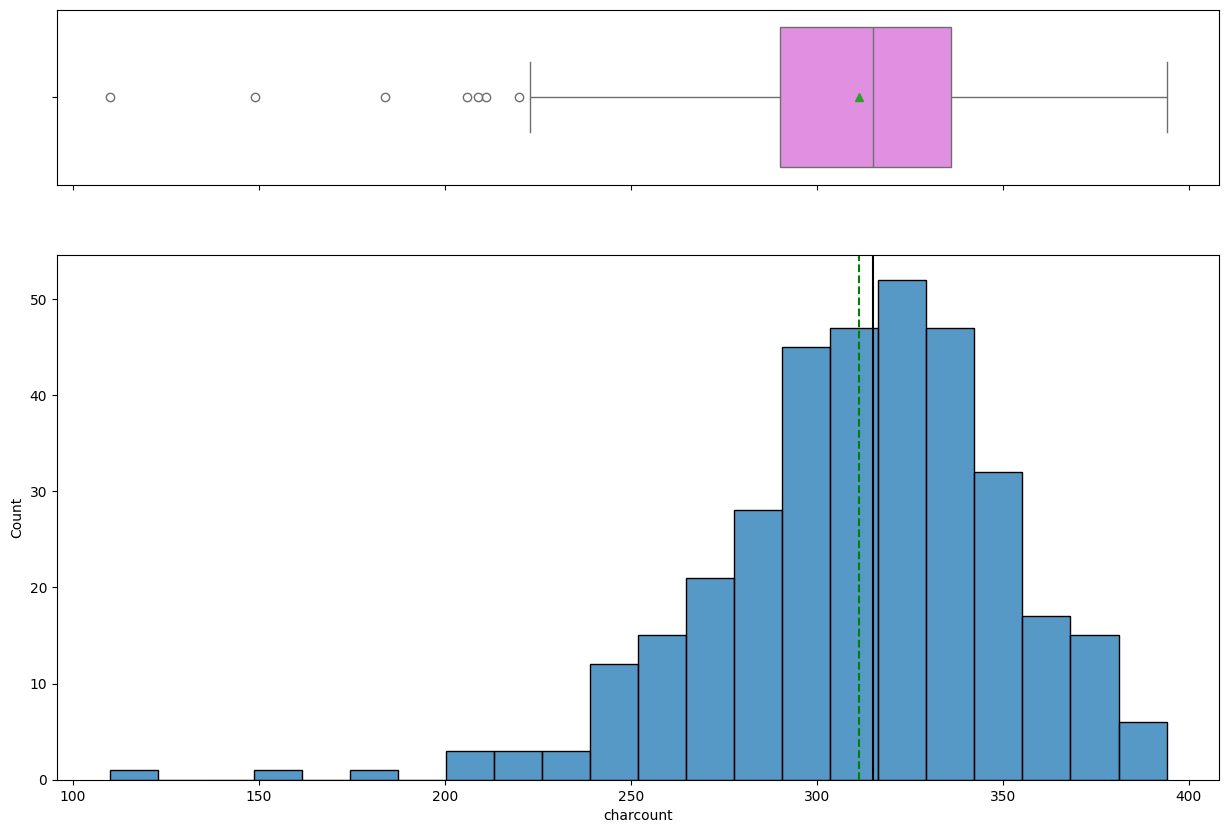

In [ ]:
histogram_boxplot(data, "charcount")

**Checking the distribution of sentiments**

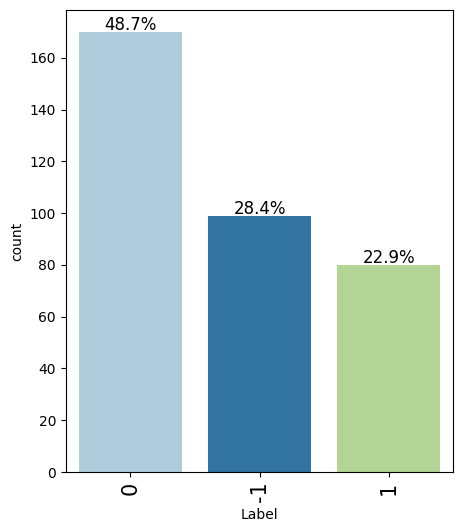

In [ ]:
labeled_barplot(data, "Label", perc=True)

### Bivariate Analysis

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,349.00000,46.22923,6.44282,37.56750,41.74000,45.97500,50.70750,66.81750
High,349.00000,46.70046,6.50732,37.81750,42.24500,46.02500,50.85000,67.06250
Low,349.00000,45.74539,6.39198,37.30500,41.48250,45.64000,49.77750,65.86250
Close,349.00000,44.92632,6.39834,36.25413,40.24691,44.59692,49.11079,64.80523
Volume,349.00000,128948236.10315,43170314.91896,45448000.00000,103272000.00000,115627200.00000,151125200.00000,244439200.00000
Label,349.00000,-0.05444,0.71512,-1.00000,-1.00000,0.00000,0.00000,1.00000
wordcount,349.00000,48.34957,5.71732,18.00000,45.00000,49.00000,52.00000,60.00000
charcount,349.00000,311.23782,39.07947,110.00000,290.00000,315.00000,336.00000,394.00000
difference,349.00000,1.30292,0.55612,-0.18636,0.88532,1.33474,1.67276,2.68779


daystatus  gain  loss  All
Label                     
All         343     6  349
0           167     3  170
-1           97     2   99
1            79     1   80
------------------------------------------------------------------------------------------------------------------------


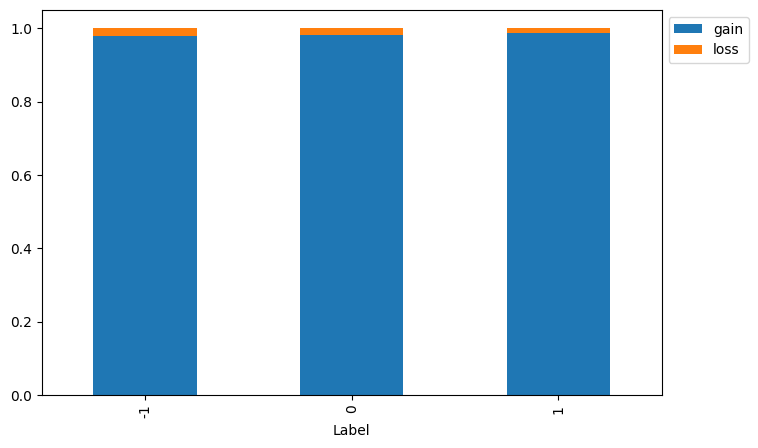

In [ ]:
stacked_barplot(data, "Label", "daystatus")

In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract day, month, and year from the 'Date' column
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.strftime('%B')  # Full month name
data['year'] = data['Date'].dt.year

In [ ]:
data.head(5)

,Date,News,Open,High,Low,Close,Volume,Label,wordcount,charcount,difference,daystatus,day,month,year
0,2019-01-02,The tech sector experienced a significant dec...,41.74000,42.24500,41.48250,40.24691,130672400,-1,45,324,1.49309,gain,2,January,2019
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.74000,42.24500,41.48250,40.24691,130672400,-1,50,323,1.49309,gain,2,January,2019
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.74000,42.24500,41.48250,40.24691,130672400,-1,48,296,1.49309,gain,2,January,2019
3,2019-01-02,This news article reports that yields on long...,41.74000,42.24500,41.48250,40.24691,130672400,-1,50,300,1.49309,gain,2,January,2019
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.74000,42.24500,41.48250,40.24691,130672400,-1,49,305,1.49309,gain,2,January,2019


daystatus  gain  loss  All
month                     
January     160     6  166
All         343     6  349
April        63     0   63
February     53     0   53
March        67     0   67
------------------------------------------------------------------------------------------------------------------------


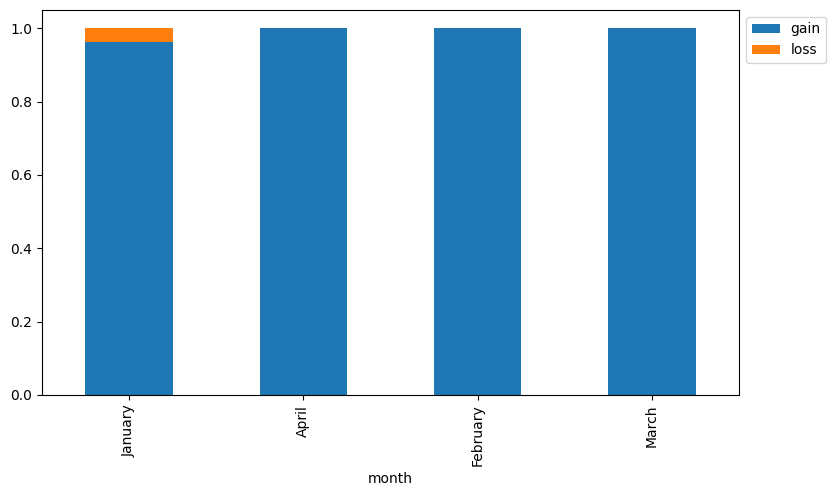

In [ ]:
stacked_barplot(data, "month", "daystatus")

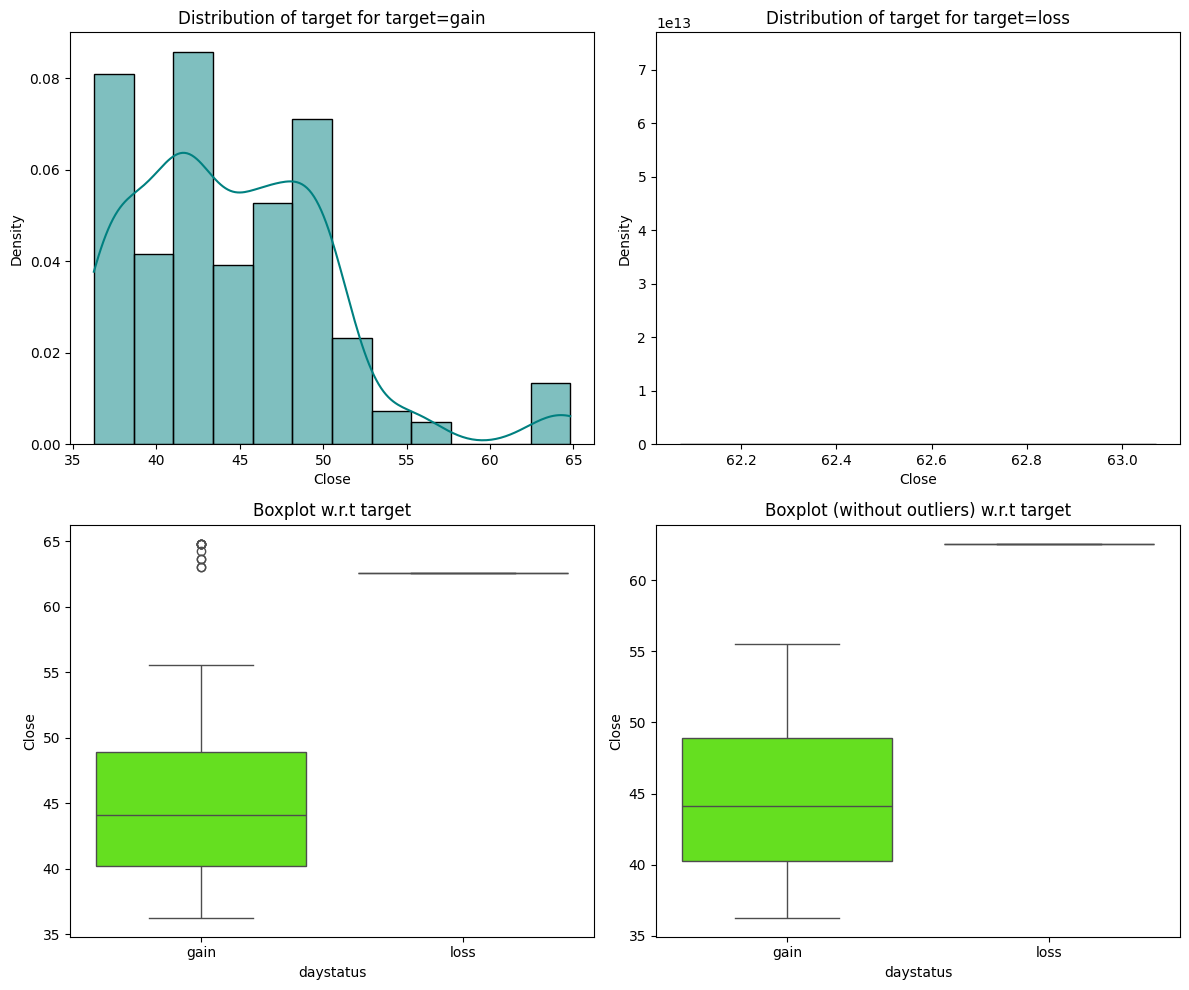

In [ ]:
distribution_plot_wrt_target(data, "Close", 'daystatus')

In [ ]:
data.head(4)

,Date,News,Open,High,Low,Close,Volume,Label,wordcount,charcount,difference,daystatus,day,month,year
0,2019-01-02,The tech sector experienced a significant dec...,41.74000,42.24500,41.48250,40.24691,130672400,-1,45,324,1.49309,gain,2,January,2019
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.74000,42.24500,41.48250,40.24691,130672400,-1,50,323,1.49309,gain,2,January,2019
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.74000,42.24500,41.48250,40.24691,130672400,-1,48,296,1.49309,gain,2,January,2019
3,2019-01-02,This news article reports that yields on long...,41.74000,42.24500,41.48250,40.24691,130672400,-1,50,300,1.49309,gain,2,January,2019


* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

## **Data Preprocessing**

### **Removing special characters**

In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
# Applying the function to remove special characters
data['cleaned_text'] = data['News'].apply(remove_special_characters)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,The tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,Apple lowered its fiscal Q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,Apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,This news article reports that yields on long...


### **Lowercasing**

In [ ]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,the tech sector experienced a significant dec...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance ...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue fo...
3,This news article reports that yields on long...,this news article reports that yields on long...


### **Removing extra whitespace**

In [ ]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['News','cleaned_text']]

,News,cleaned_text
0,The tech sector experienced a significant dec...,the tech sector experienced a significant decl...
1,Apple lowered its fiscal Q1 revenue guidance ...,apple lowered its fiscal q1 revenue guidance t...
2,Apple cut its fiscal first quarter revenue fo...,apple cut its fiscal first quarter revenue for...
3,This news article reports that yields on long...,this news article reports that yields on long ...


### **Removing stopwords**

In [ ]:
import nltk
nltk.download('stopwords')  # This downloads the stopwords data
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])
    return new_text

In [ ]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,the tech sector experienced a significant decl...,tech sector experienced significant decline af...
1,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...
2,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...
3,this news article reports that yields on long ...,news article reports yields long dated u treas...


### **Stemming**

In [ ]:
from nltk.stem import PorterStemmer


In [ ]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [ ]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [ ]:
# Applying the function to perform stemming
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,tech sector experienced significant decline af...,tech sector experienc signific declin aftermar...
1,apple lowered fiscal q1 revenue guidance 84 bi...,appl lower fiscal q1 revenu guidanc 84 billion...
2,apple cut fiscal first quarter revenue forecas...,appl cut fiscal first quarter revenu forecast ...


In [ ]:
data.head(4)

,Date,News,Open,High,Low,Close,Volume,Label,wordcount,charcount,difference,daystatus,day,month,year,cleaned_text,cleaned_text_without_stopwords,final_cleaned_text
0,2019-01-02,The tech sector experienced a significant dec...,41.74000,42.24500,41.48250,40.24691,130672400,-1,45,324,1.49309,gain,2,January,2019,the tech sector experienced a significant decl...,tech sector experienced significant decline af...,tech sector experienc signific declin aftermar...
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.74000,42.24500,41.48250,40.24691,130672400,-1,50,323,1.49309,gain,2,January,2019,apple lowered its fiscal q1 revenue guidance t...,apple lowered fiscal q1 revenue guidance 84 bi...,appl lower fiscal q1 revenu guidanc 84 billion...
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.74000,42.24500,41.48250,40.24691,130672400,-1,48,296,1.49309,gain,2,January,2019,apple cut its fiscal first quarter revenue for...,apple cut fiscal first quarter revenue forecas...,appl cut fiscal first quarter revenu forecast ...
3,2019-01-02,This news article reports that yields on long...,41.74000,42.24500,41.48250,40.24691,130672400,-1,50,300,1.49309,gain,2,January,2019,this news article reports that yields on long ...,news article reports yields long dated u treas...,news articl report yield long date u treasuri ...


In [ ]:
data.dtypes

,0
Date,datetime64[ns]
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64
wordcount,int64
charcount,int64


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#import gensim
from gensim.models import Word2Vec


In [ ]:
data['tokens'] = data['final_cleaned_text'].apply(nltk.word_tokenize)

In [ ]:
word2vec_model = Word2Vec(sentences=data['tokens'], vector_size=100, window=5, min_count=1, workers=4)
data['word2vec'] = data['tokens'].apply(lambda x: np.mean([word2vec_model.wv[word] for word in x if word in word2vec_model.wv], axis=0))


In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load and preprocess data
# Assuming 'data' is a pandas DataFrame with 'text' and 'sentiment' columns
X_train, X_test, y_train, y_test = train_test_split(data['final_cleaned_text'], data['Label'], test_size=0.2, random_state=42)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(X_train, total_examples=len(X_train), epochs=10)


def vectorize_text(text, model, vector_size=100):
    words = [model.wv[word] for word in text.split() if word in model.wv]
    if len(words) == 0:
        return np.zeros(vector_size)
    return np.mean(words, axis=0)

X_train_vec = np.array([vectorize_text(text, word2vec_model) for text in X_train])
X_test_vec = np.array([vectorize_text(text, word2vec_model) for text in X_test])


# Train ML model
clf = RandomForestClassifier()
clf.fit(X_train_vec, y_train)

# Evaluate model
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))





              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        20
           0       0.45      0.87      0.59        31
           1       0.25      0.05      0.09        19

    accuracy                           0.40        70
   macro avg       0.23      0.31      0.23        70
weighted avg       0.27      0.40      0.29        70



In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from gensim.models import KeyedVectors

In [ ]:


# Load GloVe model
glove_model = KeyedVectors.load_word2vec_format('glove.6B.100d.txt.word2vec', binary=False)

# Convert text to vectors
def vectorize_text_glove(text, model):
    return np.mean([model[word] for word in text.split() if word in model], axis=0)

X_train_vec_glove = np.array([vectorize_text_glove(text, glove_model) for text in X_train])
X_test_vec_glove = np.array([vectorize_text_glove(text, glove_model) for text in X_test])

# Define the classifier
clf = RandomForestClassifier()

# Train and evaluate ML model (same as above)
clf.fit(X_train_vec_glove, y_train)
y_pred_glove = clf.predict(X_test_vec_glove)
print(classification_report(y_test, y_pred_glove))



              precision    recall  f1-score   support

          -1       0.23      0.15      0.18        20
           0       0.45      0.81      0.58        31
           1       0.00      0.00      0.00        19

    accuracy                           0.40        70
   macro avg       0.23      0.32      0.25        70
weighted avg       0.27      0.40      0.31        70



In [ ]:
print(X_train.isnull().sum())
X_train = X_train.reset_index(drop=True)


0


In [ ]:
print(type(X_train))
print(X_train.head())


<class 'pandas.core.series.Series'>
0    european commiss initi investig tax rule grant...
1    sever chines retail includ alibaba back sune j...
2    lynx equiti strategi analyst kc rajkumar jahan...
3    asia gold price rose six month high concern gl...
4    merced benz sold 2 31 million passeng car 2018...
Name: final_cleaned_text, dtype: object


In [ ]:
from sentence_transformers import SentenceTransformer

# Load Sentence Transformer model
sentence_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Convert text to vectors
X_train_list = X_train.tolist()
X_train_vec_sentence = sentence_model.encode(X_train_list)

#X_train_vec_sentence = sentence_model.encode(X_train)
X_test_list = X_test.tolist()
X_test_vec_sentence = sentence_model.encode(X_test_list)

# Train and evaluate ML model (same as above)
clf.fit(X_train_vec_sentence, y_train)
y_pred_sentence = clf.predict(X_test_vec_sentence)
print(classification_report(y_test, y_pred_sentence))


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

              precision    recall  f1-score   support

          -1       0.75      0.15      0.25        20
           0       0.46      0.94      0.62        31
           1       0.67      0.11      0.18        19

    accuracy                           0.49        70
   macro avg       0.63      0.40      0.35        70
weighted avg       0.60      0.49      0.39        70



In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class SklearnSentenceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name):
        self.model = SentenceTransformer(model_name)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.model.encode(X)

    def get_params(self, deep=True):
        return {"model_name": self.model_name}

    def set_params(self, **params):
        self.model = SentenceTransformer(params["model_name"])
        return self

# Usage
sentence_model = SklearnSentenceTransformer('all-MiniLM-L6-v2')


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec

class Word2VecEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, vector_size=100, window=5, min_count=1):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.model = None

    def fit(self, X, y=None):
        self.model = Word2Vec(vector_size=self.vector_size, window=self.window, min_count=self.min_count)
        self.model.build_vocab(X)
        self.model.train(X, total_examples=self.model.corpus_count, epochs=self.model.epochs)
        return self

    def transform(self, X):
        return [self.model.wv[word] for word in X if word in self.model.wv]


In [ ]:
w2v_estimator = Word2VecEstimator(vector_size=200, window=10, min_count=5)


In [ ]:
# Example usage with GridSearchCV
from sklearn.model_selection import GridSearchCV



In [ ]:

params = {
    'vector_size': [100, 200],
    'window': [5, 10],
    'min_count': [1, 5]
}



In [ ]:
w2v_estimator = Word2VecEstimator()
grid_search = GridSearchCV(estimator=w2v_estimator, param_grid=params, cv=3, scoring='accuracy')
#grid_search = GridSearchCV(estimator=w2v_estimator, param_grid=params, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Word2VecEstimator(),
             param_grid={'min_count': [1, 5], 'vector_size': [100, 200],
                         'window': [5, 10]},
             scoring='accuracy')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have your data ready in X_train and y_train
# X_train = ...
# y_train = ...

# Define the models
models = {
 #   'sentence_model': sentence_model,
 #   'glove_model': glove_model,
    'word2vec_model': word2vec_model
}

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the best model and score
best_model = None
best_score = 0

# Iterate over each model
for model_name, model in models.items():
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Check if this model is better than the best one found so far
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_

print(f"Best Model: {best_model}")
print(f"Best Score: {best_score}")



InvalidParameterError: The 'estimator' parameter of GridSearchCV must be an object implementing 'fit'. Got <gensim.models.word2vec.Word2Vec object at 0x0000022B4D7C76B0> instead.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer



def train_model(X_train, y_train, X_test, y_test, embedding):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(np.vstack(X_train[embedding]), y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(np.vstack(X_test[embedding]))
    print(f"Performance for {embedding}:")
    print(classification_report(y_test, y_pred))
    return best_model


In [ ]:
print(X_train.keys())
X_train['word2vec']

In [ ]:
best_word2vec_model = train_model(X_train, y_train, X_test, y_test, 'word2vec')
best_glove_model = train_model(X_train, y_train, X_test, y_test, 'glove')
best_sentence_transformer_model = train_model(X_train, y_train, X_test, y_test, 'sentence_transformer')

KeyError: 'word2vec'

## **Word Embeddings**

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

In [ ]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

In [ ]:
result = glove_model.most_similar("stock", topn=5)
print(result)

In [ ]:
glove_words = glove_model.index_to_key

In [ ]:
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
glove_word_vector_dict

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
df_Glove = pd.DataFrame(data['final_cleaned_text'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Glove

# **Machine Learning**

In [ ]:
# creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['negative', 'positive']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**We'll be building Random Forest models with the vectorized data obtain from different vectorization techniques.**

## **Random Forest with Word2Vec**

In [ ]:
# Storing independent variable
X = df_Glove.copy()

# Storing target variable
y = data.Label

In [ ]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.25, random_state = 42)

In [ ]:
# Building the model
#rf_word2vec = RandomForestClassifier(n_estimators = 300, max_depth = 3, random_state = 42)
rf_word2vec = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=5,          # Maximum depth of each tree
    min_samples_split=2,     # Minimum samples required to split an internal node
    min_samples_leaf=3,      # Minimum samples required to be at a leaf node
    bootstrap=True,          # Whether bootstrap samples are used when building trees
    max_leaf_nodes=3      # Maximum number of leaf nodes in each tree
)

# Fitting on train data
rf_word2vec.fit(X_train, y_train)

In [ ]:
# Predicting on train data
y_pred_train = rf_word2vec.predict(X_train)

# Predicting on test data
y_pred_test = rf_word2vec.predict(X_test)

In [ ]:
plot_confusion_matrix(y_train, y_pred_train)

In [ ]:
plot_confusion_matrix(y_test, y_pred_test)

**Classification report**

In [ ]:
print(classification_report(y_train,y_pred_train))

In [ ]:
print(classification_report(y_test,y_pred_test))

## **Sentiment Analysis**

## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

#### Loading the model

#### Aggregating the data weekly

In [ ]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

In [ ]:
weekly_grouped

In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=_____, #Complete the code to set the maximum number of tokens the model should generate for this task.
      temperature=_____, #Complete the code to set the value for temperature.
      top_p=_____, #Complete the code to set the value for top_p
      top_k=_____, #Complete the code to set the value for top_k
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

##### Checking the model output on the weekly data

##### Formatting the model output

## **Conclusions and Recommendations**

-




<font size=6 color='blue'>Power Ahead</font>
___